# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pendahuluan](#pendahuluan)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Tahapan Proyek](#tahapan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#1)
    - [Memuat seluruh Library](#11)
    - [Memuat seluruh data untuk masing-masing tabel dan membaca serta menganalisanya](#12)
        - [Tabel marketing](#121)
        - [Tabel user](#122)
        - [Tabel tindakan pengguna atau suatu peristiwa](#123)
        - [Tabel group user](#124)
- [Pra-Pemrosesan Data](#2)
    - [Melihat dan memperbaiki nilai yang hilang](#21)
    - [Mengatasi untuk tipe data](#22)
- [Analisis Data Eksplorasi](#3)
    - [Pelajari konversi di berbagai tahapan corong](#31)
    - [Jumlah peristiwa per pengguna di seluruh sampel](#32)
    - [Mengidentifikasi pengguna yang berada di kedua sampel](#33)
    - [Distribusian jumlah peristiwa berdasarkan hari](#34)
    - [Ciri-ciri khusus pada data](#35)
- [Evaluasi hasil A/B testing](#4)
    - [Apa yang bisa Anda katakan tentang hasil A/B testing?](#41)
        - [Melihat Kelompok A dan B Berdasarkan wilayah](#411)
        - [Melihat Kelompok A dan B Berdasarkan Device](#412)
        - [Melihat Kelompok A dan B Berdasarkan Konversi Kejadian/Peristiwa](#413)
        - [Melihat Kelompok A dan B Berdasarkan Promo](#414)
        - [Melihat Kelompok A dan B Berdasarkan Hasil Penjualannya](#415)
    - [Gunakan uji z atau z-test untuk menguji perbedaan statistik di antara proporsinya](#42)
- [Kesimpulan](#5)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita memerlukan analisa secara menyeluruh dengan seksama. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah analisa yang dibuatnya benar atau tidak.

Dalam proyek ini diminta untuk melakukan test A/B untuk `recommender_system_test` (menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan)

# Pengantar Proyek

Anda telah menerima sebuah tugas analitik dari suatu toko daring internasional. Pendahulu Anda gagal untuk menyelesaikan tugas ini: dia sempat menjalankan A/B testing sebelum akhirnya berhenti dari pekerjaannya (demi beternak ayam di kampung). Dia hanya meninggalkan spesifikasi teknis dan hasil dari eksperimen yang dilakukannya.

Adapun deskripsi teknis untuk A/B testing ini dari karyawan pendahulu, yaitu:

- Nama eksperimen: recommender_system_test
- Kelompok: А (kontrol), B (corong pembayaran yang baru)
- Tanggal dimulainya eksperimen: 07-12-2020
- Tanggal saat mereka berhenti menerima pengguna baru: 21-12-2020
- Tanggal berakhirnya eksperimen: 01-01-2021
- Audiens: 15% pengguna baru dari kawasan Uni Eropa
- Tujuan eksperimen: menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan
- Hasil yang diharapkan: dalam kurun waktu 14 hari setelah pendaftaran, para pengguna menunjukkan peningkatan dalam hal konversi ke tayangan halaman produk (peristiwa atau event product_page), aktivitas penambahan item ke keranjang belanja (product_cart), dan pembelian (purchase). Pada setiap tahapan corong product_page → product_cart → purchase, minimal akan ada peningkatan sebesar 10%
- Jumlah peserta eksperimen yang diharapkan: 6.000

# Tujuan Proyek

Untuk meningkatkan pembayaran dengan perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan.

# Tahapan Proyek

Ada empat file yang akan dianalisa, yaitu:

- `ab_project_marketing_events_us.csv` — kalender event pemasaran untuk tahun 2020
    - `name` — nama event pemasaran
    - `regions` — kawasan tempat kampanye iklan akan berlangsung
    - `start_dt` — tanggal awal kampanye
    - `finish_dt` — tanggal akhir kampanye
    
    
- `final_ab_new_users_upd_us.csv` — semua pengguna yang mendaftar di toko daring dari tanggal 7 sampai 21 Desember 2020
    - `user_id` — id user
    - `first_date` — tanggal pendaftaran (sign up)
    - `region` — asal negara user
    - `device` — perangkat yang digunakan untuk mendaftar
    
    
- `final_ab_events_upd_us.csv` — semua peristiwa dari pengguna baru sepanjang periode 7 Desember 2020 sampai 1 Januari 2021
    - `user_id` — id user
    - `event_dt` — tanggal dan waktu peristiwa
    - `event_name` — nama jenis peristiwa
    - `details` — data tambahan terkait peristiwa tersebut (misalnya, jumlah total pesanan dalam USD untuk peristiwa `purchase`)
    
    
- `final_ab_participants_upd_us.csv` — tabel yang berisi daftar peserta eksperimen
    - `user_id` — id user
    - `ab_test` — nama eksperimen
    - `group` — kelompok eksperimen pengguna berasal
    
    
Lalu melakukan pra-pemrosesan data sebelum dianalisa, setelah itu maka akan langsung di analisa beberap poin, yaitu:
- Pelajari konversi di berbagai tahapan corong.
- Menganalisa jumlah peristiwa per pengguna terdistribusi secara merata di seluruh sampel atau tidak
- Menganalisa pengguna yang berada di kedua sampel
- Menganalisa pendistribusian jumlah peristiwa berdasarkan hari
- Menganalisa memiliki ciri-ciri khusus yang harus dipertimbangkan sebelum memulai A/B testing
- Menganalisa tentang hasil A/B testing
- Uji A/B testingnya
- Membuat kesimpulan dari Analisa Data Eksplorasi dan Uji A/B testingnya

## Memuat seluruh Library dan Membaca filenya

### Memuat seluruh Library

Sebelum memulai analisa, diperlukan library yang hanya dibutuhkan untuk analisa kali ini.

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
import math
# Menyembunyikan warning
import warnings

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

### Memuat seluruh data untuk masing-masing tabel dan membaca serta menganalisanya.

#### Tabel marketing

In [ ]:
# Memuat file tabel marketing_event
df_marketing_event = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [ ]:
# Melihat tabelnya
df_marketing_event.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


**Deskripsi Data**

Tabel marketing_event:

- `name` — nama event pemasaran
- `regions` — kawasan tempat kampanye iklan akan berlangsung
- `start_dt` — tanggal awal kampanye
- `finish_dt` — tanggal akhir kampanye

In [ ]:
# Melihat informasi keseluruhan pada tabel marketing_event
df_marketing_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [ ]:
# Melihat nilai yang hilang pada tabel marketing_event
df_marketing_event.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel marketing_event
df_marketing_event.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris dan kolom pada tabel marketing_event
df_marketing_event.shape

(14, 4)

Setelah melihat dan menganalisa tabel marketing_event, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Tidak mempunyai masalah untuk nilai yang hilang
- Tidak mempunyai masalah untuk nilai yang duplikasi
- Tidak mempunyai masalah untuk nama kolomnya
- Mempunyai masalah untuk tipe data `start_dt` dan `finish_dt` yang perlu di konversi menjadi waktu

#### Tabel user

In [ ]:
# Memuat file tabel ab_user
df_ab_user = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

In [ ]:
# Melihat tabelnya 
df_ab_user.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


**Deskripsi Data**

Tabel ab_user:

- `user_id` — id user
- `first_date` — tanggal pendaftaran (sign up)
- `region` — asal negara user
- `device` — perangkat yang digunakan untuk mendaftar

In [ ]:
# Melihat informasi keseluruhan pada tabel ab_user
df_ab_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
# Melihat nilai yang hilang pada tabel ab_user
df_ab_user.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel ab_user
df_ab_user.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris dan kolom pada tabel ab_user
df_ab_user.shape

(58703, 4)

Setelah melihat dan menganalisa tabel ab_user, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Tidak mempunyai masalah untuk nilai yang hilang
- Tidak mempunyai masalah untuk nilai yang duplikasi
- Tidak mempunyai masalah untuk nama kolomnya
- Tidak mempunyai masalah untuk tipe data 

####  Tabel tindakan pengguna atau suatu peristiwa

In [ ]:
# Memuat file tabel log_event
df_log_event = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

In [ ]:
# Melihat tabelnya
df_log_event.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


**Deskripsi Data**

Tabel log_event:

- `user_id` — id user
- `event_dt` — tanggal dan waktu peristiwa
- `event_name` — nama jenis peristiwa
- `details` — data tambahan terkait peristiwa tersebut (misalnya, jumlah total pesanan dalam USD untuk peristiwa `purchase`)

In [ ]:
# Melihat informasi keseluruhan pada tabel log_event
df_log_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [ ]:
# Melihat nilai yang hilang pada tabel log_event
df_log_event.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel log_event
df_log_event.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris dan kolom pada tabel log_event
df_log_event.shape

(423761, 4)

Setelah melihat dan menganalisa tabel log_event, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Mempunyai masalah untuk nilai yang hilang
- Mempunyai masalah untuk nilai yang duplikasi
- Mempunyai masalah untuk tipe data `event_dt` yang perlu di konversi menjadi waktu 
- Tidak mempunyai masalah untuk nama kolomnya

Untuk masalah nilai hilang dan duplikasi perlu analisa lebih lanjut di `Pra-Pemrosesan data`, karena untuk melihat apakah masalah itu benar atau tidak.

#### Tabel group user

In [ ]:
# Memuat file tabel group_ab_user
df_group_ab_user = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [ ]:
# Melihat tabelnya
df_group_ab_user.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


**Deskripsi Data**

Tabel group_ab_user:

- `user_id` — id user
- `ab_test` — nama eksperimen
- `group` — kelompok eksperimen pengguna berasal

In [ ]:
# Melihat informasi keseluruhan pada tabel group_ab_user
df_group_ab_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [ ]:
# Melihat nilai yang hilang pada tabel group_ab_user
df_group_ab_user.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel group_ab_user
df_group_ab_user.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris dan kolom pada tabel group_ab_user
df_group_ab_user.shape

(14525, 3)

Setelah melihat dan menganalisa tabel group_ab_user, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Tidak mempunyai masalah untuk nilai yang hilang
- Tidak mempunyai masalah untuk nilai yang duplikasi
- Tidak mempunyai masalah untuk tipe data
- Tidak mempunyai masalah untuk nama kolomnya

## Pra-Pemrosesan Data

### Melihat dan memperbaiki nilai yang hilang

Pada tabel tindakan pengguna atau suatu peristiwa, bahwa ada nilai yang hilang pada kolom `details`. Sebaiknya analisa dahulu untuk kolom `details` itu mempunyai hubungan dengan kolom lain dan hubungannya seperti apa.

In [ ]:
# Melihat nilai yang hilang 
df_log_event.loc[df_log_event['details'].isna()]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


Setelah dilihat secara sekilas untuk tabel ini, bahwa nilai hilang tersebut kemungkinan mempunyai hubungan terhadap dengan kolom `event_name`. Sebaiknya periksa untuk distribusi value untuk yang dimana nilai pada kolom `details` hilang dan yang tidak.

In [ ]:
# Melihat distribusi value untuk dimana nilai value pada kolom details hilang
df_log_event.loc[df_log_event['details'].isna()]['event_name'].sort_values().unique()

array(['login', 'product_cart', 'product_page'], dtype=object)

In [ ]:
# Melihat distribusi value untuk dimana nilai value pada kolom details tidak hilang
df_log_event.loc[~df_log_event['details'].isna()]['event_name'].sort_values().unique()

array(['purchase'], dtype=object)

Setelah dilihat bahwa value pada kolom `details` adalah informasi tambahan untuk para pengguna yang sudah melaukan pembayaran berupa jumlah harga (`USD`) untuk melakukan pembelian. Jadi, ini tidak bisa dikatan nilai hilang untuk dimana kegiatan selain `purchase` karena selain `purchase` kegiatan para pengguna tidak akan memberikan informasi tambahan. Solusi terbaik adalah untuk mengganti nilai hilang menjadi 0.

In [ ]:
# Menghapus kolom details di tabel log_event
df_log_event = df_log_event.fillna(0)

In [ ]:
# Melihat kembali jumlah nilai yang hilang setelah memperbaiki tabelnya
df_log_event.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

In [ ]:
# Melihat hasilnya dengan nilai yang hilang pada kolom details
df_log_event.loc[df_log_event['details'].isna()]

,user_id,event_dt,event_name,details


Kolom `details` untuk tabel log_event sudah lebih baik, dan tabel tersebut bisa untuk analisa pada proses selanjutnya.

### Mengatasi untuk tipe data

Bahwa untuk masing-masing tabel yang mempunyai masalah tipe data hanyalah masalah tanggal & waktu, jadi akan diubah disini semua tabel yang mempunyai masalah tersebut.

In [ ]:
# Mengubah tipe data waktu & tanggal pada tabel marketing_event
df_marketing_event['finish_dt'] = pd.to_datetime(df_marketing_event['finish_dt'])
df_marketing_event['start_dt'] = pd.to_datetime(df_marketing_event['start_dt'])

In [ ]:
# Mengubah tipe data waktu & tanggal pada tabel ab_user
df_ab_user['first_date'] = pd.to_datetime(df_ab_user['first_date'])

In [ ]:
# Mengubah tipe data waktu & tanggal pada tabel log_event
df_log_event['event_dt'] = pd.to_datetime(df_log_event['event_dt'] )

In [ ]:
# Melihat tipe data pada tabel marketing_event
df_marketing_event.dtypes

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object

In [ ]:
# Melihat tipe data pada tabel ab_user
df_ab_user.dtypes

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

In [ ]:
# Melihat tipe data pada tabel log_event
df_log_event.dtypes

user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

Semua tipe data sudah terlihat sesuai pada tabel masing-masing.

Setelah tahap Pra-Pemrosesan data sudah selesai, maka semua tabel siap untuk proses analisis data eksplorasi dan uji hipotesis.

## Analisis Data Eksplorasi

- Pelajari konversi di berbagai tahapan corong.
- Apakah jumlah peristiwa per pengguna terdistribusi secara merata di seluruh sampel?
- Apakah ada pengguna yang berada di kedua sampel?
- Bagaimana pendistribusian jumlah peristiwa berdasarkan hari?
- Apakah data Anda memiliki ciri-ciri khusus yang harus dipertimbangkan sebelum memulai A/B testing?

Setelah melihat pertanyaan-pertanyaan yang diajukan pada sebelumnya, perlu untuk menggabungkan beberapa tabel. Karena tidak ada ketentuan khusus untuk setiap pertanyaan yang dimana akan lebih membuat lebih efisien untuk alur eksplorasinya tanpa perlu kerja dua kali dan mudah dipahami untuk proses analisanya dan melihat dan menganalisa tabel tersebut untuk `Deskripsi Teknis`.

**Deskripsi Teknis**

- Nama eksperimen: recommender_system_test
- Kelompok: А (kontrol), B (corong pembayaran yang baru)
- Tanggal dimulainya eksperimen: 07-12-2020
- Tanggal saat mereka berhenti menerima pengguna baru: 21-12-2020
- Tanggal berakhirnya eksperimen: 01-01-2021
- Audiens: 15% pengguna baru dari kawasan Uni Eropa
- Tujuan eksperimen: menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan
- Hasil yang diharapkan: dalam kurun waktu 14 hari setelah pendaftaran, para pengguna menunjukkan peningkatan dalam hal konversi ke tayangan halaman produk (peristiwa atau event `product_page`), aktivitas penambahan item ke keranjang belanja (`product_cart`), dan pembelian (`purchase`). Pada setiap tahapan corong `product_page` → `product_cart` → `purchase`, minimal akan ada peningkatan sebesar 10%
- Jumlah peserta eksperimen yang diharapkan: 6.000

In [ ]:
# Menggabungkan tabel-tabel yang diinginkan
# Menggabungkan tabel ab_user dengan log_event
df_user_event = pd.merge(df_ab_user, df_log_event, on = 'user_id')

In [ ]:
# Menggabungkan tabel-tabel yang diinginkan
# Menggabungkan tabel user_event dengan group_ab_user
df_final = pd.merge(df_user_event, df_group_ab_user, on = 'user_id')

In [ ]:
# Melihat tabel final
df_final.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-07 09:05:47,product_cart,0.0,A,interface_eu_test
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-10 04:13:53,product_cart,0.0,A,interface_eu_test
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-12 17:54:57,product_cart,0.0,A,interface_eu_test


In [ ]:
# Melihat informasi keseluruhan pada tabel final 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102838 entries, 0 to 102837
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     102838 non-null  object        
 1   first_date  102838 non-null  datetime64[ns]
 2   region      102838 non-null  object        
 3   device      102838 non-null  object        
 4   event_dt    102838 non-null  datetime64[ns]
 5   event_name  102838 non-null  object        
 6   details     102838 non-null  float64       
 7   group       102838 non-null  object        
 8   ab_test     102838 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 7.8+ MB


Alasan penggabungan dengan merge, karena hanya untuk mendeteksi pengguna yang menjadi uji eksperimen tersebut. Artinya, ada kemungkinan pengguna yang tidak termasuk eksperimen tersebut meskipun ada aktivitas yang sesuai dengan waktu eksperimen berlangsung.

Karena yang diminta untuk A/B test hanya `recommender_system_test`, maka selain test itu akan tidak di masukan pada tabel ini.

In [ ]:
# Membuat tabel untuk recommender_system_test pada A/B test-nya
df_final = df_final.query('ab_test == "recommender_system_test"')

In [ ]:
# Melihat hasilnya
df_final.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test
42,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test
44,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,0.0,B,recommender_system_test
46,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,0.0,B,recommender_system_test


In [ ]:
# Melihat masing-masing negara untuk A/B test
df_final['region'].unique()

array(['EU', 'APAC', 'CIS', 'N.America'], dtype=object)

In [ ]:
# Melihat jumlah total pesesrta yang ikut dalam A/B Test 
df_final['user_id'].nunique()

3675

In [ ]:
# Melihat jumlah kejadian dalam A/B Test 
df_final['user_id'].value_counts().sum()

23909

Ternyata untuk peserta eksperimen A/B test recommender_system_test atau menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan tidak memenuhi harapannya yang di perkirakan sebesar 6000 pengguna ternyata hanya 3675 pengguna saja yang di ikutkan.

In [ ]:
# Melihat total peserta dari berbagai kawasan
user_count_region = df_final.pivot_table(index = 'region',
                                  values = 'user_id',
                                  aggfunc = 'nunique').reset_index()

In [ ]:
# Melihat total persen peserta dari berbagai kawasan
user_count_region['percentage'] = ((user_count_region['user_id'] / 
                                   user_count_region['user_id'].sum()) * 100 ).round(2)
user_count_region.sort_values('percentage', ascending = False)

,region,user_id,percentage
2,EU,3481,94.72
3,N.America,119,3.24
0,APAC,45,1.22
1,CIS,30,0.82


Untuk peserta baru dari kawasan atau daerah eropa / EU di eksperimen ini mencapai sebesar 94.72%. Hal itu melampaui dari harapannya yang dimana 15%.

In [ ]:
# Melihat informasi distribusi tabel df_final
df_final.describe()

,details
count,23909.000000
mean,3.078042
std,26.798087
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,499.990000


Dari melihat tabel ini bahwa semua data untuk memulai A/B sudah sesuai dengan pernyataan, seperti:

- Tanggal dimulainya eksperimen (untuk peserta yang mendaftar baru(`first_date`) dan memulai aktivitasnya(`event_dt`)): 07-12-2020
- Tanggal saat mereka berhenti menerima pengguna baru(untuk tanggal peserta yang mendaftar baru(`first_date`)): 21-12-2020
- Tanggal berakhirnya eksperimen (`event_dt`): 30-12-2020 (satu hari sebelum 01-01-2021)

In [ ]:
# Meliaht jenis grupnya
df_final['group'].unique()

array(['A', 'B'], dtype=object)

Untuk grup, bahwa ada dua dan sesuai dengan deskriptif teknis, yaitu grup `A` dan grup `B`.

Ada satu hal lagi yang perlu dilakukan sebelum memulai eksplorasi dari pertanyaan-pertanyaan diatas, yaitu untuk membuat kolom baru untuk konversi hari dari `event_dt`. Alasannya selain untuk analisa distribusi dalam bentuk hari, juga untuk membuat kolom baru terkait pengaruh promo `Christmas&New Year Promo` yang dilakukan di wilayan `EU & N.America` terhadap aktivitas berlangsung.

In [ ]:
# Mengekstrak hari untuk kolom even_dt dan membuat kolom baru
df_final['event_date'] = df_final['event_dt'].dt.date
df_final['event_date'] = pd.to_datetime(df_final['event_date'])

In [ ]:
# Melihat tipe data
df_final.dtypes

user_id               object
first_date    datetime64[ns]
region                object
device                object
event_dt      datetime64[ns]
event_name            object
details              float64
group                 object
ab_test               object
event_date    datetime64[ns]
dtype: object

In [ ]:
# Memfilter untuk region dan tanggal mendapatkan Christmas & New Year Promo
christmas_newyear_promo= df_final.loc[((df_final['region'] == 'EU') 
                                       | (df_final['region'] == 'N.America')) 
                                      & ((df_final['event_date'] >= '2020-12-25') 
                                         & (df_final['event_date'] <= '2021-01-03'))]
christmas_newyear_promo.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date
52,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-30 12:42:57,product_page,0.0,B,recommender_system_test,2020-12-30
64,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-30 12:42:56,login,0.0,B,recommender_system_test,2020-12-30
372,75845C83258FBF73,2020-12-07,EU,Android,2020-12-30 06:42:52,product_cart,0.0,B,recommender_system_test,2020-12-30
376,75845C83258FBF73,2020-12-07,EU,Android,2020-12-30 06:42:52,login,0.0,B,recommender_system_test,2020-12-30
436,6A581C74EF4D5F44,2020-12-07,EU,iPhone,2020-12-29 21:46:48,login,0.0,B,recommender_system_test,2020-12-29


In [ ]:
# Membuat kolom baru untuk mengidentifikasi Christmas & New Year Promo
christmas_newyear_promo['promo'] = 'Christmas & New Year Promo'

In [ ]:
# Melihat hasilnya
christmas_newyear_promo

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
52,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-30 12:42:57,product_page,0.00,B,recommender_system_test,2020-12-30,Christmas & New Year Promo
64,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-30 12:42:56,login,0.00,B,recommender_system_test,2020-12-30,Christmas & New Year Promo
372,75845C83258FBF73,2020-12-07,EU,Android,2020-12-30 06:42:52,product_cart,0.00,B,recommender_system_test,2020-12-30,Christmas & New Year Promo
376,75845C83258FBF73,2020-12-07,EU,Android,2020-12-30 06:42:52,login,0.00,B,recommender_system_test,2020-12-30,Christmas & New Year Promo
436,6A581C74EF4D5F44,2020-12-07,EU,iPhone,2020-12-29 21:46:48,login,0.00,B,recommender_system_test,2020-12-29,Christmas & New Year Promo
...,...,...,...,...,...,...,...,...,...,...,...
102631,553BAE96C6EB6240,2020-12-20,EU,Android,2020-12-29 14:09:14,login,0.00,A,recommender_system_test,2020-12-29,Christmas & New Year Promo
102796,574ACBC674BC385D,2020-12-20,EU,Mac,2020-12-26 04:55:27,purchase,4.99,A,recommender_system_test,2020-12-26,Christmas & New Year Promo
102798,574ACBC674BC385D,2020-12-20,EU,Mac,2020-12-26 04:55:29,product_cart,0.00,A,recommender_system_test,2020-12-26,Christmas & New Year Promo
102800,574ACBC674BC385D,2020-12-20,EU,Mac,2020-12-26 04:55:28,product_page,0.00,A,recommender_system_test,2020-12-26,Christmas & New Year Promo


In [ ]:
# Melihat baris tabel yang mendapatkan promo Christmas & New Year Promo
christmas_newyear_promo.shape

(2494, 11)

In [ ]:
# Melakukan seleksi kolom user id dan promo
christmas_newyear_promo = christmas_newyear_promo[['user_id', 'promo']]
christmas_newyear_promo

,user_id,promo
52,DD4352CDCF8C3D57,Christmas & New Year Promo
64,DD4352CDCF8C3D57,Christmas & New Year Promo
372,75845C83258FBF73,Christmas & New Year Promo
376,75845C83258FBF73,Christmas & New Year Promo
436,6A581C74EF4D5F44,Christmas & New Year Promo
...,...,...
102631,553BAE96C6EB6240,Christmas & New Year Promo
102796,574ACBC674BC385D,Christmas & New Year Promo
102798,574ACBC674BC385D,Christmas & New Year Promo
102800,574ACBC674BC385D,Christmas & New Year Promo


In [ ]:
# Melihat jumlah baris di tabel df_final
df_final.shape

(23909, 10)

Rencananya, akan digabungkan tabel pengguna yang mendapatkan Christmas & New Year Promo dengan tabel utama.

In [ ]:
# Menggabungkan tabel utama dan tabel Christmas & New Year Promo
df_final = df_final.merge(christmas_newyear_promo, on = 'user_id', how = 'left')

In [ ]:
# Melihat hasilnya
df_final

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test,2020-12-07,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test,2020-12-07,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,0.0,B,recommender_system_test,2020-12-08,Christmas & New Year Promo
...,...,...,...,...,...,...,...,...,...,...,...
39192,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,0.0,A,recommender_system_test,2020-12-21,NaN
39193,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,0.0,A,recommender_system_test,2020-12-24,NaN
39194,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,0.0,A,recommender_system_test,2020-12-20,NaN
39195,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,0.0,A,recommender_system_test,2020-12-21,NaN


Sepertinya terjadi penambahan baris secara tidak langsung dari 23909 baris menjadi 39197 baris yang dimana kelebihan 15288 baris, maka perlu melihat untuk tabel yang mempunyai nilai hilang dan duplikasi agar tau langkah selanjutnya harus diapakan.

In [ ]:
# Melihat nilai hilang
df_final.isna().sum()

user_id           0
first_date        0
region            0
device            0
event_dt          0
event_name        0
details           0
group             0
ab_test           0
event_date        0
promo         15934
dtype: int64

In [ ]:
# Melihat jumlah baris duplikasi
df_final.duplicated().sum()

15288

Karena lebih masuk logika baris menjadi duplikasi dibanding nilai hilang sebaiknya men-drop nilai duplikasinya saja, karena langkah selanjutnya mengganti nilai hilang menjadi `Non-Promo` untuk pengguna yang tidak mendapatkan `Christmas & New Year Promo`.

In [ ]:
# Menghilangkan nilai duplikasi
df_final = df_final.drop_duplicates()

In [ ]:
# Melihat hasilnya
df_final

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test,2020-12-07,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test,2020-12-07,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,0.0,B,recommender_system_test,2020-12-08,Christmas & New Year Promo
6,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,0.0,B,recommender_system_test,2020-12-10,Christmas & New Year Promo
...,...,...,...,...,...,...,...,...,...,...,...
39192,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,0.0,A,recommender_system_test,2020-12-21,NaN
39193,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,0.0,A,recommender_system_test,2020-12-24,NaN
39194,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,0.0,A,recommender_system_test,2020-12-20,NaN
39195,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,0.0,A,recommender_system_test,2020-12-21,NaN


Jumlah baris kembali lagi dari 39197 baris menjadi 23909 baris, artinya 15288 baris sudah berhasil di perbaiki.

In [ ]:
# Mengisi nilai hilang pada tabel promo dengan identifikasi Non-Promo
df_final = df_final.fillna(value = 'Non-Promo')

In [ ]:
# Melihat hasilnya
df_final

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test,2020-12-07,Non-Promo
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test,2020-12-07,Non-Promo
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,0.0,B,recommender_system_test,2020-12-08,Christmas & New Year Promo
6,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,0.0,B,recommender_system_test,2020-12-10,Christmas & New Year Promo
...,...,...,...,...,...,...,...,...,...,...,...
39192,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,0.0,A,recommender_system_test,2020-12-21,Non-Promo
39193,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,0.0,A,recommender_system_test,2020-12-24,Non-Promo
39194,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,0.0,A,recommender_system_test,2020-12-20,Non-Promo
39195,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,0.0,A,recommender_system_test,2020-12-21,Non-Promo


In [ ]:
# Melihat nilai hilang kembali untuk crosscheck
df_final.isna().sum()

user_id       0
first_date    0
region        0
device        0
event_dt      0
event_name    0
details       0
group         0
ab_test       0
event_date    0
promo         0
dtype: int64

In [ ]:
# Melihat jumlah baris duplikasi kembali untuk crosscheck
df_final.duplicated().sum()

0

Masalah untuk `Christmas & New Year Promo` sudah selesai, saatnya untuk cek promo lainnya.

In [ ]:
# Melihat dan mengidentifikasi promo
df_marketing_event

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Seperinya masih ada promo `CIS New Year Gift Lottery` pada region `CIS` yang diadakan pada tanggal `2020-12-30` s/d `2021-01-07`, mari lihat untuk data detailnya.

In [ ]:
# Melihat dan mengidentifikasi pengguna yang mendapatkan CIS New Year Gift Lottery
df_final.loc[(df_final['region'] == 'CIS') 
             & ((df_final['event_date'] >= '2020-12-30') 
                & (df_final['event_date'] <= '2021-01-07'))]

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo


In [ ]:
df_final.loc[(df_final['region'] == 'CIS')].describe()

,details
count,206.000000
mean,0.751942
std,7.072939
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99.990000


Sepertinya tidak ada aktivitas atau peristiwa untuk pengguna pada tanggal dan region tersebut, artinya tidak perlu ada tindakan untuk mengidentifikasi para pengguna tersebut.

### Pelajari konversi di berbagai tahapan corong.

In [ ]:
# Melihat kejadiannya
df_final['event_name'].unique()

array(['product_page', 'login', 'purchase', 'product_cart'], dtype=object)

Untuk kejadiannya akan di bikin 4 tahapan yang sudah diidentifikasikan dan diurutkan, yaitu:

- Login
- Product_page
- Product_cart
- Purchase

In [ ]:
# Membuat corong berdasarkan jumlah peristiwa
event_count = df_final.pivot_table(index = 'event_name',
                                  values = 'user_id',
                                  aggfunc = 'count').sort_values('user_id', ascending = False)
# Mengurutkan berdasarkan kejadian yang sudah ditentukan
event_count = event_count.take([0, 1, 3, 2])
# Membuat nilai persentase setiap corongnya 
event_count['percentage'] = ((event_count / event_count.shift()) * 100).round(2)
# Mereset index
event_count = event_count.reset_index()
# Melihat hasilnya
event_count

,event_name,user_id,percentage
0,login,10837,NaN
1,product_page,6702,61.84
2,product_cart,3160,47.15
3,purchase,3210,101.58


In [ ]:
# Membuat corong berdasarkan jumlah pengguna
event_user = df_final.pivot_table(index = 'event_name',
                                  values = 'user_id',
                                  aggfunc = 'nunique').sort_values('user_id', ascending = False)
# Mengurutkan berdasarkan kejadian yang sudah ditentukan
event_user = event_user.take([0, 1, 3, 2])
# Membuat nilai persentase setiap corongnya 
event_user['percentage'] = ((event_user / event_user.shift()) * 100).round(2)
# Mereset index
event_user = event_user.reset_index()
# Melihat hasilnya
event_user

,event_name,user_id,percentage
0,login,3674,NaN
1,product_page,2303,62.68
2,product_cart,1079,46.85
3,purchase,1128,104.54


Baik corong untuk jumlah total kejadian dan corong untuk jumlah total pengguna tidak seperti di harapkan untuk peningkatan setiap corongnya minimal 10%. Bahkan untuk dari `product_page` ke `product_cart` mengalami penurunan baik jumlah total kejadian dan corong untuk jumlah total pengguna. untuk `product_cart` ke `puchase` bahwa ada peningkatan tahapan corong, tetapi hanya sedikit saja. Untuk jumlah total kejadian hanya 1.58% dan untuk jumlah total pengguna hanya 4.54%.

### Jumlah peristiwa per pengguna di seluruh sampel

In [ ]:
# Memfilter pengguna berdasarkan sampel grup A dan B
event_user_sample_a = df_final.query('group == "A"')
event_user_sample_b = df_final.query('group == "B"')

In [ ]:
# Melihat kejadiannya sampel grup A
event_user_sample_a['event_name'].unique()

array(['product_page', 'login', 'purchase', 'product_cart'], dtype=object)

In [ ]:
# Melihat kejadiannya sampel grup B
event_user_sample_b['event_name'].unique()

array(['product_page', 'login', 'product_cart', 'purchase'], dtype=object)

Untuk kejadiannya akan di bikin 4 tahapan baik dari sampe grup `A` dan `B` yang sudah diidentifikasikan dan diurutkan, yaitu:

- Login
- Product_page
- Product_cart
- Purchase

In [ ]:
# Membuat corong berdasarkan jumlah pengguna sampel grup A
event_user_group_a = event_user_sample_a.pivot_table(index = 'event_name',
                                                     values = 'user_id', 
                                                     aggfunc = 'nunique').sort_values('user_id', ascending = False)
# Mengurutkan berdasarkan kejadian yang sudah ditentukan
event_user_group_a = event_user_group_a.take([0, 1, 3, 2])
# Membuat nilai persentase setiap corongnya 
event_user_group_a['percentage'] = ((event_user_group_a / event_user_group_a.shift()) * 100).round(2)
# Mereset index
event_user_group_a = event_user_group_a.reset_index()
# Melihat hasilnya
event_user_group_a

,event_name,user_id,percentage
0,login,2747,NaN
1,product_page,1780,64.80
2,product_cart,824,46.29
3,purchase,872,105.83


Untuk kelompok A bahwa pengguannya dari `login` menuju `product_page` hanya berkisaran 64.80%, dari `product_page` ke `product_cart` tidak sampa setengahnya yaitu 46.29%, dan `product_cart` ke `puchase` ternyata terjadi peningkatan sebesar 5.83% atau 48 pengguna dari 824 di `product_cart`.

In [ ]:
# Membuat corong berdasarkan jumlah pengguna sampel grup B
event_user_group_b = event_user_sample_b.pivot_table(index = 'event_name',
                                                     values = 'user_id', 
                                                     aggfunc = 'nunique').sort_values('user_id', ascending = False)
# Mengurutkan berdasarkan kejadian yang sudah ditentukan
event_user_group_b = event_user_group_b.take([0, 1, 3, 2])
# Membuat nilai persentase setiap corongnya 
event_user_group_b['percentage'] = ((event_user_group_b / event_user_group_b.shift()) * 100).round(2)
# Mereset index
event_user_group_b = event_user_group_b.reset_index()
# Melihat hasilnya
event_user_group_b

,event_name,user_id,percentage
0,login,927,NaN
1,product_page,523,56.42
2,product_cart,255,48.76
3,purchase,256,100.39


Untuk kelompok B bahwa pengguannya dari `login` menuju `product_page` hanya berkisaran 56.42%, dari `product_page` ke `product_cart` tidak sampa setengahnya yaitu 48.76%, dan `product_cart` ke `puchase` ternyata terjadi peningkatan sebesar 1 pengguna saja dari 255 di `product_cart`.

Kesimpulan:

Bahwa distribusi peristiwa per-pengguna antara kelompok A dan kelompok B tidaklah rata, terjadi ketimpangan yang dimana pengguna kelompok A lebih banyak ketimbang kelompok B dan hal itu bisa langsung terlihat jelas jika membandinkannya.  

### Mengidentifikasi pengguna yang berada di kedua sampel

In [ ]:
# Mengidentifikasi pengguna yang berada di grup A dan B sekaligus (metode .loc)
df_final.loc[(df_final['group'] == 'A') & (df_final['group'] == 'B')]

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo


In [ ]:
# Mengidentifikasi pengguna yang berada di grup A dan B sekaligus (metode .query())
df_final.query('group == "A" & group == "B"')

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo


Kesimpulan:

Tidak ada pengguna satupun yang berada di dua kelompok sekaligus, artinya data tersebut akan aman dari bias saat pengujian nanti.

### Distribusian jumlah peristiwa berdasarkan hari

Dalam melihat distribusi peristiwa berdasarkan hari, saya lebih memilih untuk melihat dengan satu chart untuk bisa membandingkan distribusi semua peristiwa. Maka nanti tabel di filter untuk di agregasi dan di hasilnya akan digabungkan.

In [ ]:
# Melihat peristiwanya
df_final['event_name'].unique()

array(['product_page', 'login', 'purchase', 'product_cart'], dtype=object)

Untuk kejadiannya akan di bikin 4 tahapan yang sudah diidentifikasikan dan diurutkan, yaitu:

- Login
- Product_page
- Product_cart
- Purchase

In [ ]:
# Memfilter untuk peristiwa login
df_login = df_final.query('event_name == "login"')
df_login.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,0.0,A,recommender_system_test,2020-12-07,Non-Promo
14,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:53,login,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
16,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:27,login,0.0,B,recommender_system_test,2020-12-08,Christmas & New Year Promo
18,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:24,login,0.0,B,recommender_system_test,2020-12-10,Christmas & New Year Promo
20,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-16 20:35:47,login,0.0,B,recommender_system_test,2020-12-16,Christmas & New Year Promo


In [ ]:
# Menghitung peristiwanya dalam harian
login_per_day = df_login.groupby('event_date').agg({'event_name' : 'count'}).reset_index()
login_per_day.columns = ['date', 'login_count']
login_per_day

,date,login_count
0,2020-12-07,319
1,2020-12-08,278
2,2020-12-09,350
3,2020-12-10,296
4,2020-12-11,274
5,2020-12-12,280
6,2020-12-13,251
7,2020-12-14,619
8,2020-12-15,589
9,2020-12-16,643


In [ ]:
# Memfilter untuk peristiwa product_page
df_product_page = df_final.query('event_name == "product_page"')
df_product_page.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,0.0,A,recommender_system_test,2020-12-07,Non-Promo
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,0.0,B,recommender_system_test,2020-12-07,Christmas & New Year Promo
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,0.0,B,recommender_system_test,2020-12-08,Christmas & New Year Promo
6,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,0.0,B,recommender_system_test,2020-12-10,Christmas & New Year Promo
8,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-16 20:35:48,product_page,0.0,B,recommender_system_test,2020-12-16,Christmas & New Year Promo


In [ ]:
# Menghitung peristiwanya dalam harian
product_page_per_day = df_product_page.groupby('event_date').agg({'event_name' : 'count'}).reset_index()
product_page_per_day.columns = ['date', 'product_page_count']
product_page_per_day

,date,product_page_count
0,2020-12-07,204
1,2020-12-08,172
2,2020-12-09,212
3,2020-12-10,166
4,2020-12-11,148
5,2020-12-12,147
6,2020-12-13,139
7,2020-12-14,375
8,2020-12-15,358
9,2020-12-16,402


In [ ]:
# Menggabungkan tabelnya dari tabel sebelumnya
x1 = login_per_day.merge(product_page_per_day, on = 'date', how = 'left')
x1

,date,login_count,product_page_count
0,2020-12-07,319,204
1,2020-12-08,278,172
2,2020-12-09,350,212
3,2020-12-10,296,166
4,2020-12-11,274,148
5,2020-12-12,280,147
6,2020-12-13,251,139
7,2020-12-14,619,375
8,2020-12-15,589,358
9,2020-12-16,643,402


In [ ]:
# Memfilter untuk peristiwa product_cart
df_product_cart = df_final.query('event_name == "product_cart"')
df_product_cart.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
28,831887FE7F2D6CBA,2020-12-07,EU,Android,2020-12-07 06:50:30,product_cart,0.0,A,recommender_system_test,2020-12-07,Non-Promo
29,831887FE7F2D6CBA,2020-12-07,EU,Android,2020-12-08 10:52:27,product_cart,0.0,A,recommender_system_test,2020-12-08,Non-Promo
30,831887FE7F2D6CBA,2020-12-07,EU,Android,2020-12-09 02:19:17,product_cart,0.0,A,recommender_system_test,2020-12-09,Non-Promo
46,7D1BFB181017EB46,2020-12-07,CIS,PC,2020-12-07 15:50:23,product_cart,0.0,B,recommender_system_test,2020-12-07,Non-Promo
47,7D1BFB181017EB46,2020-12-07,CIS,PC,2020-12-09 03:35:08,product_cart,0.0,B,recommender_system_test,2020-12-09,Non-Promo


In [ ]:
# Menghitung peristiwanya dalam harian
product_cart_per_day = df_product_cart.groupby('event_date').agg({'event_name' : 'count'}).reset_index()
product_cart_per_day.columns = ['date', 'product_cart_count']
product_cart_per_day

,date,product_cart_count
0,2020-12-07,81
1,2020-12-08,71
2,2020-12-09,93
3,2020-12-10,79
4,2020-12-11,62
5,2020-12-12,68
6,2020-12-13,52
7,2020-12-14,183
8,2020-12-15,191
9,2020-12-16,205


In [ ]:
# Menggabungkan tabelnya dari tabel sebelumnya
x2 = x1.merge(product_cart_per_day, on = 'date', how = 'left')
x2

,date,login_count,product_page_count,product_cart_count
0,2020-12-07,319,204,81
1,2020-12-08,278,172,71
2,2020-12-09,350,212,93
3,2020-12-10,296,166,79
4,2020-12-11,274,148,62
5,2020-12-12,280,147,68
6,2020-12-13,251,139,52
7,2020-12-14,619,375,183
8,2020-12-15,589,358,191
9,2020-12-16,643,402,205


In [ ]:
# Memfilter untuk peristiwa purchase
df_purchase = df_final.query('event_name == "purchase"')
df_purchase.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,event_date,promo
26,831887FE7F2D6CBA,2020-12-07,EU,Android,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,Non-Promo
27,831887FE7F2D6CBA,2020-12-07,EU,Android,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-09,Non-Promo
61,3C5DD0288AC4FE23,2020-12-07,EU,PC,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,Non-Promo
103,49EA242586C87836,2020-12-07,EU,iPhone,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07,Non-Promo
104,49EA242586C87836,2020-12-07,EU,iPhone,2020-12-09 15:39:47,purchase,9.99,B,recommender_system_test,2020-12-09,Non-Promo


In [ ]:
# Menghitung peristiwanya dalam harian
purchase_per_day = df_purchase.groupby('event_date').agg({'event_name' : 'count'}).reset_index()
purchase_per_day.columns = ['date', 'purchase_count']
purchase_per_day

,date,purchase_count
0,2020-12-07,105
1,2020-12-08,72
2,2020-12-09,91
3,2020-12-10,72
4,2020-12-11,58
5,2020-12-12,63
6,2020-12-13,62
7,2020-12-14,178
8,2020-12-15,178
9,2020-12-16,204


In [ ]:
# Menggabungkan tabelnya dari tabel sebelumnya
count_event_per_day = x2.merge(purchase_per_day, on = 'date', how = 'left')
count_event_per_day

,date,login_count,product_page_count,product_cart_count,purchase_count
0,2020-12-07,319,204,81,105.0
1,2020-12-08,278,172,71,72.0
2,2020-12-09,350,212,93,91.0
3,2020-12-10,296,166,79,72.0
4,2020-12-11,274,148,62,58.0
5,2020-12-12,280,147,68,63.0
6,2020-12-13,251,139,52,62.0
7,2020-12-14,619,375,183,178.0
8,2020-12-15,589,358,191,178.0
9,2020-12-16,643,402,205,204.0


In [ ]:
# Mengganti nilai NaN menjadi 0
count_event_per_day = count_event_per_day.fillna(0)

Fungsinya agar nanti terbaca saat pembuatan chartnya.

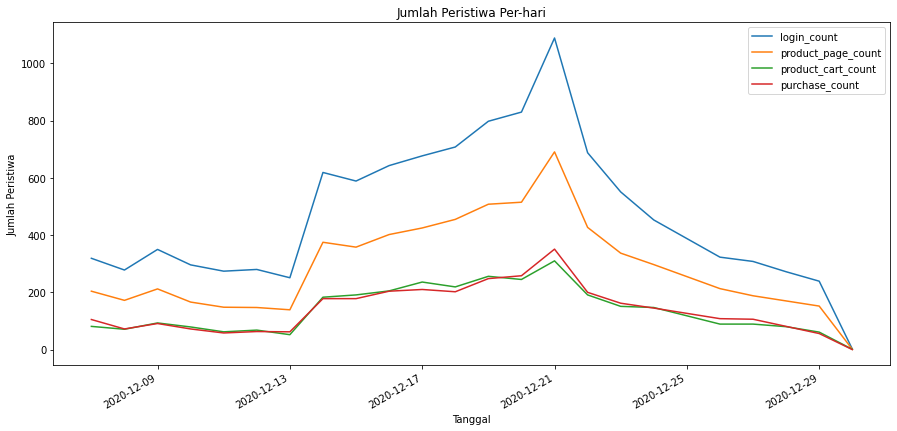

In [ ]:
# Membuat linechart untuk menghitung semua peristiwa berdasarkan harian
count_event_per_day.plot(x= 'date', kind='line', figsize=(15,7))

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peristiwa')
plt.title('Jumlah Peristiwa Per-hari')
plt.show()

Kesimpulan:

Frekuensi untuk semua peristiwa mulai meningkat mulai pada tanggal `2020-12-13` s/d `2020-12-21` yang menjadi puncaknya untuk peristiwa dan tanggal selanjutnya yaitu `2020-12-21` s/d `2020-12-30` terus mengalami penurunan. Artinya, bahwa para pengguna melakukan aktivitas pada aplikasi sebelum merayakan Natal dan Tahun Baru agar membuat persiapan dengan melihat dan membeli berbagai kebutuhan agar saat waktu Natal dan Tahun Baru berlangsung mereka tinggal merayakannya dengan barang/persiapan yang mereka beli.

### Ciri-ciri khusus pada data

Untuk melihat ciri-ciri khusus pada data, akan menganalisis melalui dari nilai valuenya per kolom.

Value yang akan dilihat yaitu dari kolom:

- Device
- Region
- Promo
- Event
- User


untuk `ab_test` tidak perlu dijelaskan karena salah satu poin utamanya yaitu menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan. 

In [ ]:
# Melihat total jumlah aktifitas berdasarkan device/perangkat
df_final.groupby('device').agg({'user_id' : 'count'}).sort_values('user_id', ascending=False)

,user_id
device,
Android,10441
PC,6122
iPhone,5028
Mac,2318


In [ ]:
# Melihat total jumlah pengguna berdasarkan device/perangkat
df_final.groupby('device').agg({'user_id' : 'nunique'}).sort_values('user_id', ascending=False)

,user_id
device,
Android,1625
PC,953
iPhone,751
Mac,346


In [ ]:
# Melihat total jumlah aktifitas berdasarkan region
df_final.groupby('region').agg({'user_id' : 'count'}).sort_values('user_id', ascending=False)

,user_id
region,
EU,22674
N.America,804
APAC,225
CIS,206


In [ ]:
# Melihat total jumlah pengguna berdasarkan device/perangkat
df_final.groupby('region').agg({'user_id' : 'nunique'}).sort_values('user_id', ascending=False)

,user_id
region,
EU,3481
N.America,119
APAC,45
CIS,30


In [ ]:
# Melihat aktivitas yang dalam mendapatkan promo dan tidak mendapatkan promo
df_final.groupby('promo').agg({'user_id' : 'count'}).sort_values('user_id', ascending=False)

,user_id
promo,
Non-Promo,15934
Christmas & New Year Promo,7975


In [ ]:
# Melihat pengguna yang mendapatkan promo dan tidak mendapatkan promo
df_final.groupby('promo').agg({'user_id' : 'nunique'}).sort_values('user_id', ascending=False)

,user_id
promo,
Non-Promo,2683
Christmas & New Year Promo,992


In [ ]:
# Melihat jumlah aktivitas di kolom kejadian/peristiwa
df_final.groupby('event_name').agg({'user_id' : 'count'}).sort_values('user_id', ascending=False)

,user_id
event_name,
login,10837
product_page,6702
purchase,3210
product_cart,3160


In [ ]:
# Melihat jumlah pengguna di kolom kejadian/peristiwa
df_final.groupby('event_name').agg({'user_id' : 'nunique'}).sort_values('user_id', ascending=False)

,user_id
event_name,
login,3674
product_page,2303
purchase,1128
product_cart,1079


In [ ]:
# Melihat total jumlah pengguna
print('Total jumlah pengguna :', df_final['user_id'].nunique())

Total jumlah pengguna : 3675


Kesimpulan:

Dengan jumlah partisipan yang kurang dari harapan yaitu 3675 pengguna, bahwa untuk perangkat/device yang mereka gunakan ditempati posisi pertama oleh andriod 1625 pengguna, lalu pc dengan 953 pengguna, dan produk Apple yaitu iphone dengan 751 pengguna dan mac 346 pengguna. Untuk region bahwa sepertinya tabel ini memiliki sebagian besar data pengguna dari EU (Uni Eropa), dan wilayah lain seperti N.Amerika (Amerika Utara), APAC (Asia Pasifik), dan CIS (Persemakmuran Negara-Negara Merdeka) yang meruapakan wilayah Rusia hanya sangat sedikit untuk pengguna yang mengikuti eksperimen ini.

Untuk promo hanya ada promo `Christmas & New Year Promo` dengan 992 pengguna yang mendapatkan promo karena terbatas untuk region dan waktunya dan pengguna yang `Non-Promo` ada 2683 pengguna. Untuk kejadiannya bahwa jumlah kejadiannya dimana ada login sebanyak 10837 kali, halaman produk 6702 kali, halaman keranjang 3160, dan halaman pembayaran 3210 kali. Untuk penggunanya bahwa sebanyak 3674 pengguna yang login, 2303 pengguna yang melihat halaman produk, 1079 pengguna yang yang melakukan kontak dengan halaman kranjang, dan 1128 pengguna yang sukses melakukan pembelian setelah membeli produknya.

## Evaluasi hasil A/B testing

- Apa yang bisa Anda katakan tentang hasil A/B testing?
- Gunakan uji z atau z-test untuk menguji perbedaan statistik di antara proporsinya.

### Apa yang bisa Anda katakan tentang hasil A/B testing?

Untuk Melihat hasil A/B akan dilihat beberapa kolom berdasarkan kelompok A dan B, adapun kolomnya, yaitu:

- Region
- Device
- Event
- Promo
- Total Revenue (Details)

#### Melihat Kelompok A dan B Berdasarkan wilayah

In [ ]:
# Melihat jumlah total kejadian di berdsarkan wilayah untuk kelompok A dan kelompok B
count_region = df_final.groupby(['region', 'group']).agg({'user_id' : 'count'}).reset_index()
count_region.columns = ['region', 'group', 'count_event']
count_region

,region,group,count_event
0,APAC,A,153
1,APAC,B,72
2,CIS,A,125
3,CIS,B,81
4,EU,A,17670
5,EU,B,5004
6,N.America,A,679
7,N.America,B,125


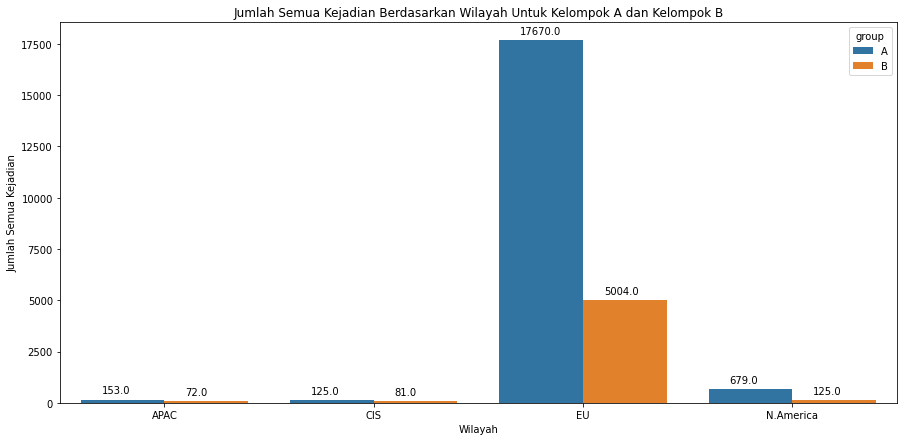

In [ ]:
# Membuat bar untuk membandingkan kejadian berdsarkan wilayah untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = count_region['region'], y = count_region['count_event'],
                 hue = count_region['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 300))

# Membuat title
plt.title('Jumlah Semua Kejadian Berdasarkan Wilayah Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Wilayah')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Semua Kejadian')
# Menampilkan
plt.show()

Kesimpulan:

Bahwa dari semua kejadian di berbagai wilayah, EU (Uni Eropa) yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B di banding wilayah lain seperti CIS, APAC, dan N.Amerika. Tetapi untuk perbandingan kelompok di wilayah EU sangat lah tinggi yang dimana kelompok A (kontrol) sangat tinggi dibanding kelompok B (kelompok uji pembayaran yang baru).

In [ ]:
# Melihat jumlah pengguna berdsarkan wilayah untuk kelompok A dan kelompok B
user_region = df_final.groupby(['region', 'group']).agg({'user_id' : 'nunique'}).reset_index()
user_region.columns = ['region', 'group', 'count_user']
user_region

,region,group,count_user
0,APAC,A,28
1,APAC,B,17
2,CIS,A,19
3,CIS,B,11
4,EU,A,2604
5,EU,B,877
6,N.America,A,96
7,N.America,B,23


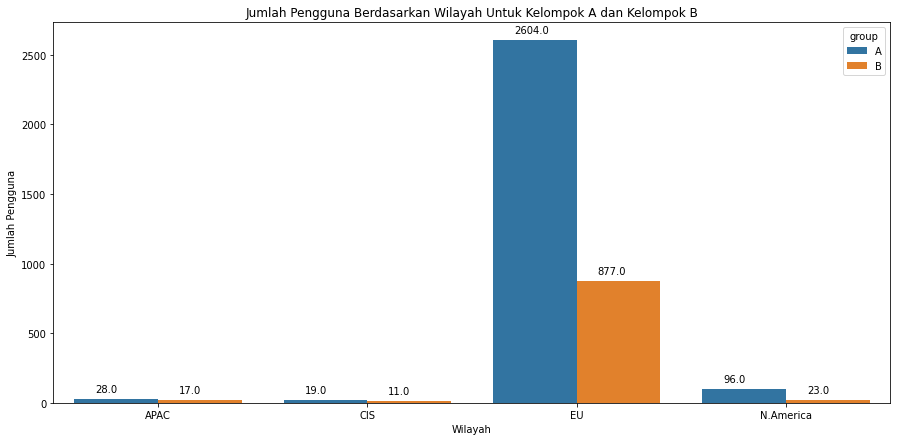

In [ ]:
# Membuat bar untuk membandingkan jumlah pengguna berdsarkan wilayah untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = user_region['region'], y = user_region['count_user'],
                 hue = user_region['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 50))

# Membuat title
plt.title('Jumlah Pengguna Berdasarkan Wilayah Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Wilayah')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Pengguna')
# Menampilkan
plt.show()

Kesimpulan:

Bahwa dari semua pengguna di berbagai wilayah, EU (Uni Eropa) yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B di banding wilayah lain seperti CIS, APAC, dan N.Amerika. Tetapi untuk perbandingan kelompok untuk pengguna di wilayah EU sangat lah tinggi yang dimana pengguna kelompok A (kontrol) sangat tinggi dibanding pengguna kelompok B (kelompok uji pembayaran yang baru).

#### Melihat Kelompok A dan B Berdasarkan Device

In [ ]:
# Melihat jumlah total kejadian di berdsarkan device untuk kelompok A dan kelompok B
count_device = df_final.groupby(['device', 'group']).agg({'user_id' : 'count'}).reset_index()
count_device.columns = ['device', 'group', 'count_event']
count_device

,device,group,count_event
0,Android,A,8011
1,Android,B,2430
2,Mac,A,1897
3,Mac,B,421
4,PC,A,4877
5,PC,B,1245
6,iPhone,A,3842
7,iPhone,B,1186


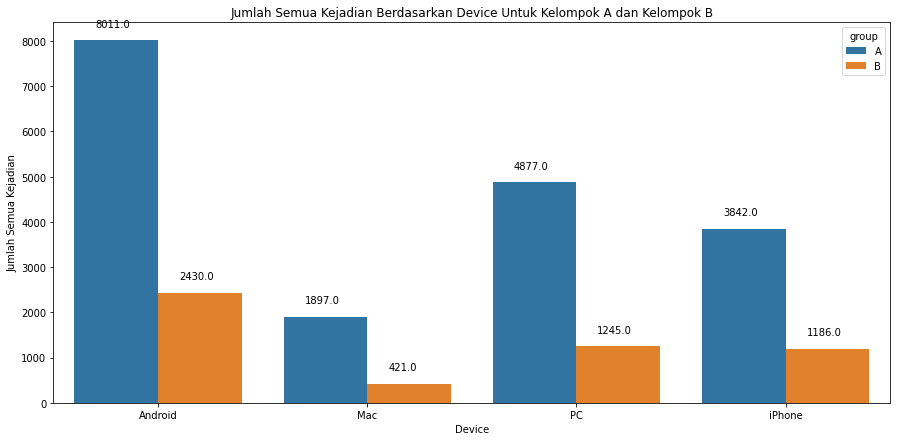

In [ ]:
# Membuat bar untuk membandingkan kejadian berdsarkan device untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = count_device['device'], y = count_device['count_event'],
                 hue = count_device['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 300))

# Membuat title
plt.title('Jumlah Semua Kejadian Berdasarkan Device Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Device')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Semua Kejadian')
# Menampilkan
plt.show()

Kesimpulan:

Bahwa dari semua kejadian berdasarkan device, device Andriod yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B, urutan kedua ditempati oleh device PC, ketiga oleh device iPhone, dan terakhir adalah pengguna device Mac. Tetapi untuk perbandingan kelompok untuk kejadian device Android sangat lah tinggi yang dimana pengguna kelompok A (kontrol) sangat tinggi dibanding kejadian kelompok B (kelompok uji pembayaran yang baru).

In [ ]:
# Melihat jumlah total pengguna di berdsarkan device untuk kelompok A dan kelompok B
user_device = df_final.groupby(['device', 'group']).agg({'user_id' : 'nunique'}).reset_index()
user_device.columns = ['device', 'group', 'count_user']
user_device

,device,group,count_user
0,Android,A,1197
1,Android,B,428
2,Mac,A,270
3,Mac,B,76
4,PC,A,726
5,PC,B,227
6,iPhone,A,554
7,iPhone,B,197


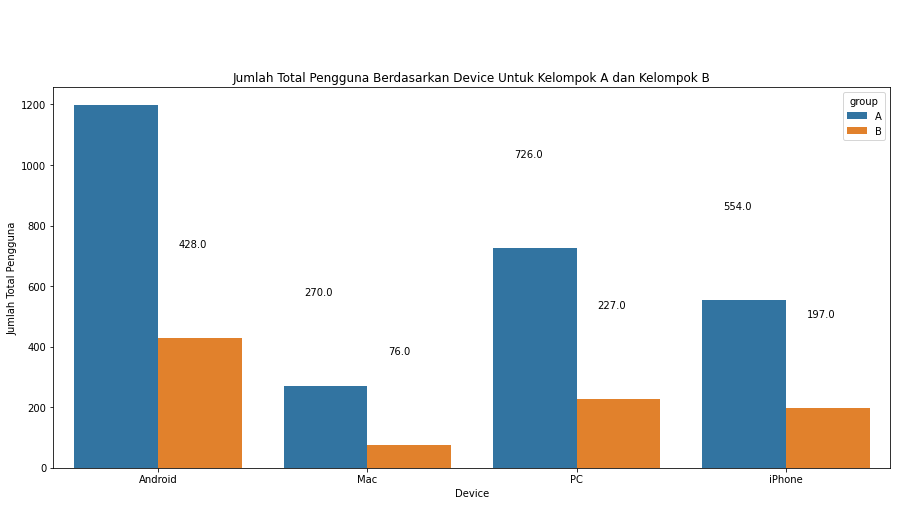

In [ ]:
# Membuat bar untuk membandingkan kejadian berdsarkan device untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = user_device['device'], y = user_device['count_user'],
                 hue = user_device['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 300))

# Membuat title
plt.title('Jumlah Total Pengguna Berdasarkan Device Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Device')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Total Pengguna')
# Menampilkan
plt.show()

Kesimpulan:

Bahwa dari semua pengguna berdasarkan device, device Andriod yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B, urutan kedua ditempati oleh device PC, ketiga oleh device iPhone, dan terakhir adalah pengguna device Mac. Tetapi untuk perbandingan kelompok untuk pengguna device Android sangat lah tinggi yang dimana pengguna kelompok A (kontrol) sangat tinggi dibanding pengguna kelompok B (kelompok uji pembayaran yang baru).

#### Melihat Kelompok A dan B Berdasarkan Konversi Kejadian/Peristiwa

In [ ]:
# Melihat jumlah total kejadian berdsarkan Konversi Kejadian/Peristiwa untuk kelompok A dan kelompok B
count_event = df_final.groupby(['event_name', 'group']).agg({'user_id' : 'count'}).reset_index()
count_event.columns = ['event_name', 'group', 'count_event']
count_event

,event_name,group,count_event
0,login,A,8272
1,login,B,2565
2,product_cart,A,2482
3,product_cart,B,678
4,product_page,A,5328
5,product_page,B,1374
6,purchase,A,2545
7,purchase,B,665


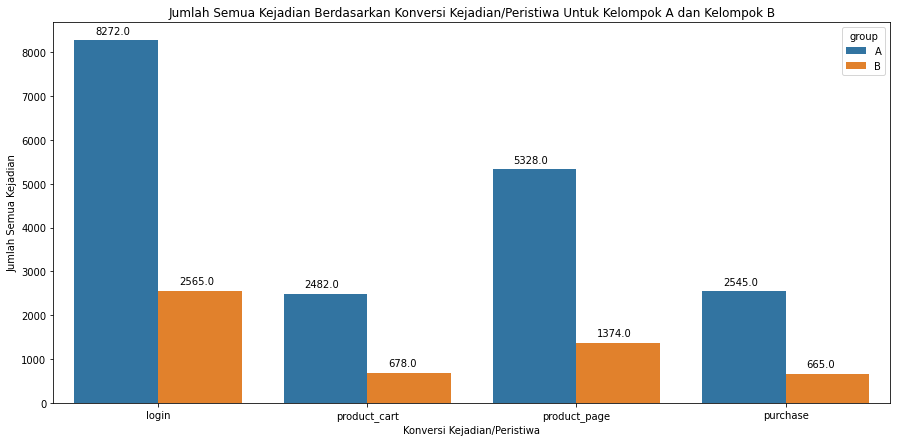

In [ ]:
# Membuat bar untuk membandingkan kejadian berdsarkan Konversi Kejadian/Peristiwa untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = count_event['event_name'], y = count_event['count_event'],
                 hue = count_event['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 150))

# Membuat title
plt.title('Jumlah Semua Kejadian Berdasarkan Konversi Kejadian/Peristiwa Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Konversi Kejadian/Peristiwa')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Semua Kejadian')
# Menampilkan
plt.show()

Kesimpulan:

Untuk konversi setiap peristiwa/kejadian bahwa kelompok A jauh lebih banyak untuk aktivitasnya di banding kelompok B.

In [ ]:
# Melihat jumlah pengguna berdsarkan peristiwa funnel untuk kelompok A dan kelompok B
user_event = df_final.groupby(['event_name', 'group']).agg({'user_id' : 'nunique'}).reset_index()
user_event.columns = ['event_name', 'group', 'count_user']
user_event

,event_name,group,count_user
0,login,A,2747
1,login,B,927
2,product_cart,A,824
3,product_cart,B,255
4,product_page,A,1780
5,product_page,B,523
6,purchase,A,872
7,purchase,B,256


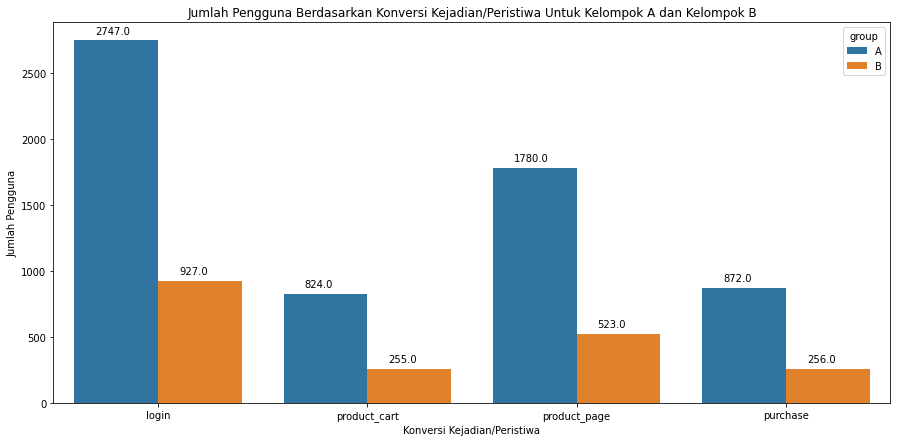

In [ ]:
# Membuat bar untuk membandingkan jumlah pengguna berdsarkan Konversi Kejadian/Peristiwa untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = user_event['event_name'], y = user_event['count_user'],
                 hue = user_event['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 50))

# Membuat title
plt.title('Jumlah Pengguna Berdasarkan Konversi Kejadian/Peristiwa Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Konversi Kejadian/Peristiwa')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Pengguna')
# Menampilkan
plt.show()

Kesimpulan:

Untuk konversi setiap peristiwa/kejadian bahwa kelompok A jauh lebih banyak untuk penggunanya di banding kelompok B.

#### Melihat Kelompok A dan B Berdasarkan Promo

In [ ]:
# Melihat jumlah pengguna berdsarkan promo untuk kelompok A dan kelompok B 
promo_user_count = df_final.groupby(['promo', 'group']).agg({'user_id' : 'nunique'}).reset_index()
promo_user_count.columns = ['promo', 'group', 'promo_user_count']
promo_user_count

,promo,group,promo_user_count
0,Christmas & New Year Promo,A,809
1,Christmas & New Year Promo,B,183
2,Non-Promo,A,1938
3,Non-Promo,B,745


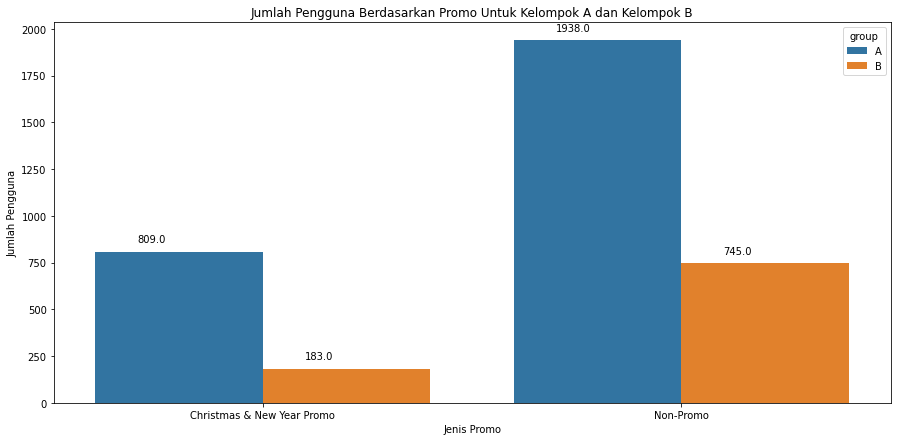

In [ ]:
# Membuat bar untuk membandingkan jumlah pengguna berdsarkan promo untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = promo_user_count['promo'], y = promo_user_count['promo_user_count'],
                 hue = promo_user_count['group'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 50))

# Membuat title
plt.title('Jumlah Pengguna Berdasarkan Promo Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Jenis Promo')
# Mendeskripsikan sumbu y
plt.ylabel('Jumlah Pengguna')
# Menampilkan
plt.show()

Kesimpulan:

Untuk promo bahwa pengguna kelompok A jauh lebih banyak untuk pengguna di banding kelompok B.

#### Melihat Kelompok A dan B Berdasarkan Hasil Penjualannya

In [ ]:
# Melihat hasil penjualan berdasarkan kelompok A dan kelompok B
total_revenue_group = df_final.groupby('group').agg({'details' : 'sum'}).reset_index()
total_revenue_group.columns = ['promo', 'total_revenue']
total_revenue_group

,promo,total_revenue
0,A,58489.55
1,B,15103.35


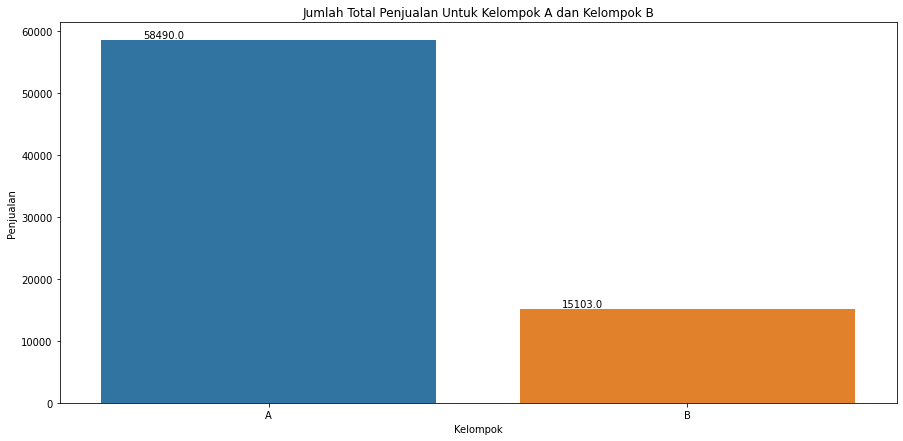

In [ ]:
# Membuat bar untuk membandingkan hasil penjualan untuk kelompok A dan kelompok B

# Membuat ukuran chartnya
plt.figure(figsize=(15,7))
# Membuat barnya
ax = sns.barplot(x = total_revenue_group['promo'], y = total_revenue_group['total_revenue'])
# Membuat keterangan jumlah kejadian di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() + 0.1, p.get_height() + 300))

# Membuat title
plt.title('Jumlah Total Penjualan Untuk Kelompok A dan Kelompok B')
# Mendeskripsikan sumbu x
plt.xlabel('Kelompok')
# Mendeskripsikan sumbu y
plt.ylabel('Penjualan')
# Menampilkan
plt.show()

Kesimpulan:

Bahwa kelompok A lebih banyak untuk menghasilkan pendapatan daripada kelompok B.

### Gunakan uji z atau z-test untuk menguji perbedaan statistik di antara proporsinya.

Adapun sebelum menguji hipotsis terkait signifikansinya untuk perbedaan pengguna yang mengeklik halaman-halaman tersebut antara kelompok A (Kontrol) dengan kelompok B (Uji kelompok (corong pembayaran yang baru), maka dibuat pernyataan terlebih dahulu.

H0 : Bahwa tidak ada perbedaan secara signifikan antara kelompok A dengan kelompok B terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

H1 : Bahwa ada perbedaan secara signifikan antara kelompok A dengan kelompok B terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

In [ ]:
# Memfilter / Agregasi berdasarkan kelompok eksperimennya
user_events_per_exp_group = df_final.pivot_table(index='event_name',
                                                 values='user_id',
                                                 columns='group',
                                                 aggfunc='nunique')
user_events_per_exp_group

group,A,B
event_name,,
login,2747,927
product_cart,824,255
product_page,1780,523
purchase,872,256


In [ ]:
# Melihat jumlah untuk setiap kelompok eksperimen
exp_user = df_final.pivot_table(index='group', values='user_id', aggfunc='nunique')
exp_user

,user_id
group,
A,2747
B,928


In [ ]:
# Membuat fungsi untuk uji hipotesis statistik perbedaan signifkan antara kelompok sampel

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):
    # proporsi keberhasilan pada kelompok pertama:
    p1 = successes1 / trials1

    # proporsi keberhasilan pada kelompok kedua:
    p2 = successes2 / trials2

    # proporsi keberhasilan dalam kumpulan data gabungan: 
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # perbedaan proporsi dalam kumpulan data
    difference = p1 - p2

    # menghitung statistik dalam simpangan baku dari distribusi normal baku
    z_value = difference / (math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)))

    # mengatur distribusi normal standar (nilai rata-rata 0, nilai standar deviasi 1)
    distr = st.norm(0, 1)

    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print('Hipotesis nol ditolak: ada perbedaan statistik secara signifikan antara kedua kelompok tersebut')
    else:
        print('Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut')

In [ ]:
# Test statistik untuk login antara kelompok A dengan kelompok B
print('Uji Hipotesis untuk layar Login')
check_hypothesis(user_events_per_exp_group.loc['login', 'A'],
                 user_events_per_exp_group.loc['login', 'B'],
                 exp_user.loc['A'],
                 exp_user.loc['B']
                )
print()
# Test statistik untuk product_page antara kelompok A dengan kelompok B
print('Uji Hipotesis untuk layar Halaman Produk')
check_hypothesis(user_events_per_exp_group.loc['product_page', 'A'],
                 user_events_per_exp_group.loc['product_page', 'B'],
                 exp_user.loc['A'],
                 exp_user.loc['B']
                )
print()
# Test statistik untuk product_cart antara kelompok A dengan kelompok B
print('Uji Hipotesis untuk layar Keranjang Produk')
check_hypothesis(user_events_per_exp_group.loc['product_cart', 'A'],
                 user_events_per_exp_group.loc['product_cart', 'B'],
                 exp_user.loc['A'],
                 exp_user.loc['B']
                )
print()
# Test statistik untuk purchase antara kelompok A dengan kelompok B
print('Uji Hipotesis untuk layar Pembayaran')
check_hypothesis(user_events_per_exp_group.loc['purchase', 'A'],
                 user_events_per_exp_group.loc['purchase', 'B'],
                 exp_user.loc['A'],
                 exp_user.loc['B']
                )

Uji Hipotesis untuk layar Login
p-value:  [0.0852986]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar Halaman Produk
p-value:  [4.31098055e-06]
Hipotesis nol ditolak: ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar Keranjang Produk
p-value:  [0.14534815]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar Pembayaran
p-value:  [0.0175924]
Hipotesis nol ditolak: ada perbedaan statistik secara signifikan antara kedua kelompok tersebut


Kesimpulan:

Bahwa untuk test A/B dimana kelompok A dengan kelompok B menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- Login
- Product Cart (Halaman Keranjang)

Bahwa untuk test A/B dimana kelompok A dengan kelompok B menunjukan hasil ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- Product Page (Halaman Produk)
- Pembayaran

## Kesimpulan

Jumlah kejadian atau peristiwa terjadi sebanyak 23909 kejadian dan jenis kejadian dalam tindakan pengguna yaitu:

- login
- product page
- product cart
- purchase
____________________________________
Ada pengguna yang sebanyak 3675 yang ikut dalam tes untul menguji perubahan terkait pengenalan sistem rekomendasi yang telah ditingkatkan yang dimulai dari 07-12-2020 s/d 01-01-2021.
____________________________________
Selama A/B test berjalan hanya ada 1 promo yang terlibat yaitu promo Christmas & New Year Promo yang diadakan di wilayah EU (Uni Eropa) dan N.America (Amerika Utara) yang dimulai dari tanggal 2020-12-25 s/d 2021-01-03. Selain promo itu promo lain tidak diterapkan karena waktu dan wilayahnya jadi untuk pengguna yang tidak mendapatkan Christmas & New Year Promo akan di kategorikan Non-promo.\
____________________________________
Wilayah yang mengikuti A/B test wilayah EU (Uni Eropa) yang menjadi dominasi dengan jumlah peserta 3481 (94.72%). Sisanya N.America, APAC, dan CIS yang kontribusi untuk A/B test sangatlah kecil.
____________________________________
Adapun keterang untuk A/B test waktu yang ditetapkan, yaitu:

- Tanggal dimulainya eksperimen (untuk peserta yang mendaftar baru(`first_date`) dan memulai aktivitasnya(`event_dt`)): 07-12-2020
- Tanggal saat mereka berhenti menerima pengguna baru(untuk tanggal peserta yang mendaftar baru(`first_date`)): 21-12-2020
- Tanggal berakhirnya eksperimen (`event_dt`): 30-12-2020 (satu hari sebelum 01-01-2021)
___________________________________
untuk A/B test ada 2 kelompok yang menjadi sampelnya, yaitu:

- Kelompok A (Kontrol)
- Kelompok B (corong pembayaran yang baru)
__________________________________
Peristiwa yang paling sering terjadi adalah peristiwa `Login`.
__________________________________
Untuk kelompok A bahwa pengguannya dari `login` menuju `product_page` hanya berkisaran 64.80%, dari `product_page` ke `product_cart` tidak sampa setengahnya yaitu 46.29%, dan `product_cart` ke `puchase` ternyata terjadi peningkatan sebesar 5.83% atau 48 pengguna dari 824 di `product_cart`.
__________________________________
Untuk kelompok B bahwa pengguannya dari `login` menuju `product_page` hanya berkisaran 56.42%, dari `product_page` ke `product_cart` tidak sampa setengahnya yaitu 48.76%, dan `product_cart` ke `puchase` ternyata terjadi peningkatan sebesar 1 pengguna saja dari 255 di `product_cart`.
__________________________________
Tidak ada pengguna satupun yang berada di dua kelompok secara bersama di kelompok A dan kelompok B.
__________________________________
Frekuensi untuk semua peristiwa mulai meningkat mulai pada tanggal `2020-12-13` s/d `2020-12-21` yang menjadi puncaknya untuk peristiwa dan tanggal selanjutnya yaitu `2020-12-21` s/d `2020-12-30` terus mengalami penurunan.
__________________________________
Bahwa dari semua kejadian di berbagai wilayah, EU (Uni Eropa) yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B dan untuk semua pengguna di berbagai wilayah, EU (Uni Eropa) yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B.
__________________________________
Bahwa dari semua kejadian berdasarkan device, device Andriod yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B dan semua pengguna berdasarkan device, device Andriod yang mempunyai aktivitas yang sangat tinggi baik kelompok A maupun kelompok B.
__________________________________
Untuk konversi setiap peristiwa/kejadian bahwa kelompok A jauh lebih banyak untuk aktivitasnya dan penggunanya di banding kelompok B. Untuk aktivitas terbanyak baik kelompok A dan kelompok B yaitu aktivitas login.
__________________________________
Untuk promo bahwa pengguna kelompok A jauh lebih banyak untuk pengguna di banding kelompok B.
__________________________________
Bahwa kelompok A lebih banyak untuk menghasilkan pendapatan daripada kelompok B.
__________________________________
Bahwa untuk test A/B dimana kelompok A dengan kelompok B menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- Login
- Product Cart (Halaman Keranjang)
__________________________________
Bahwa untuk test A/B dimana kelompok A dengan kelompok B menunjukan hasil ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- Product Page (Halaman Produk)
- Pembayaran